In [3]:
import pandas as pd

df = pd.read_csv("creditcard.csv")
print("Data loaded. Shape:", df.shape)
print(df.head())
print(df["Class"].value_counts())


Data loaded. Shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   


In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("creditcard.csv")
df["normalizedAmount"] = StandardScaler().fit_transform(df["Amount"].values.reshape(-1, 1))
df = df.drop(["Time", "Amount"], axis=1)
df.to_csv("preprocessed.csv", index=False)


In [10]:
import pandas as pd
from imblearn.over_sampling import SMOTE

df = pd.read_csv("preprocessed.csv")
X = df.drop("Class", axis=1)
y = df["Class"]

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df["Class"] = y_resampled
resampled_df.to_csv("balanced.csv", index=False)


In [11]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import joblib

df = pd.read_csv("balanced.csv")
X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
joblib.dump(model, "logistic_model.pkl")
pd.DataFrame(X_test).to_csv("X_test.csv", index=False)
pd.Series(y_test).to_csv("y_test.csv", index=False)


Matplotlib is building the font cache; this may take a moment.


              precision    recall  f1-score   support

           0       0.92      0.97      0.95     85149
           1       0.97      0.92      0.95     85440

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

[[83013  2136]
 [ 6928 78512]]
ROC AUC: 0.9891597985974838


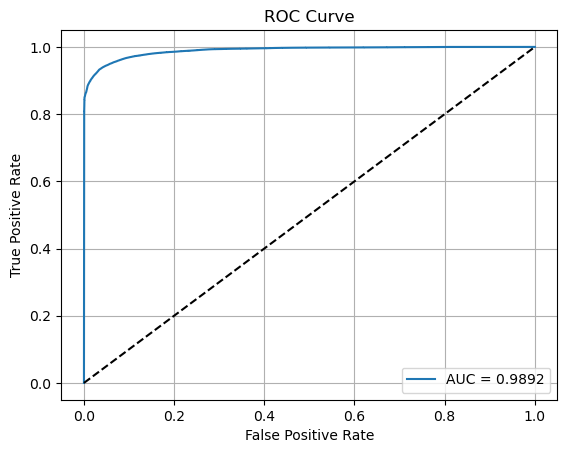

In [12]:
import pandas as pd
import joblib
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

model = joblib.load("logistic_model.pkl")
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv").squeeze()

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="AUC = {:.4f}".format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.savefig("roc_curve.png")
plt.show()
